# First Phase Evaluation Project - Avocado Project

# Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:
    •	Date - The date of the observation
    •	AveragePrice - the average price of a single avocado
    •	type - conventional or organic
    •	year - the year
    •	Region - the city or region of the observation
    •	Total Volume - Total number of avocados sold
    •	4046 - Total number of avocados with PLU 4046 sold
    •	4225 - Total number of avocados with PLU 4225 sold
    •	4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 

Dataset Link-
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\hp\\Desktop\\DS\\avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.shape

(18249, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [9]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [11]:
df['Date']=pd.to_datetime(df['Date'])

Here, we've changed the date column from object type to date type

In [12]:
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

Now, we can see th e type of date has been converted

In [13]:
#Here we will first work on separation of date and month. And then remove the unnecessary columns

df["Month"]= df["Date"].dt.month
df["Day"]= df["Date"].dt.day
df.drop("Date",axis=1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
 13  Month         18249 non-null  int64  
 14  Day           18249 non-null  int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 2.1+ MB


2 columns are now added in the dataset named as month & day.

In [15]:
#We will also drop the unnamed 0 column which is not necessary for our predictions.

df.drop(columns = ['Unnamed: 0'],inplace=True)

In [16]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [17]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


Here, we can observe that we do not have any missing or null values present in the dataset. So, we can proceed for futher steps.

# START WITH EDA 

In [19]:
df["year"].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

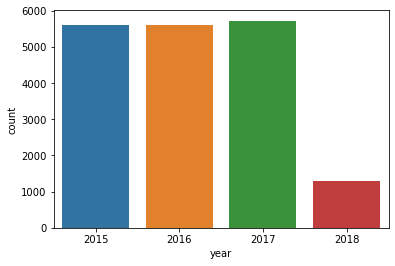

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [21]:
sns.countplot(x = "year", data=df)
plt.show()
df["year"].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

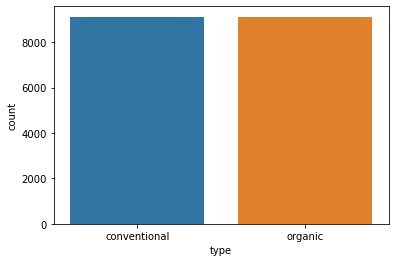

In [22]:
sns.countplot(x="type",data=df)
df["type"].value_counts()

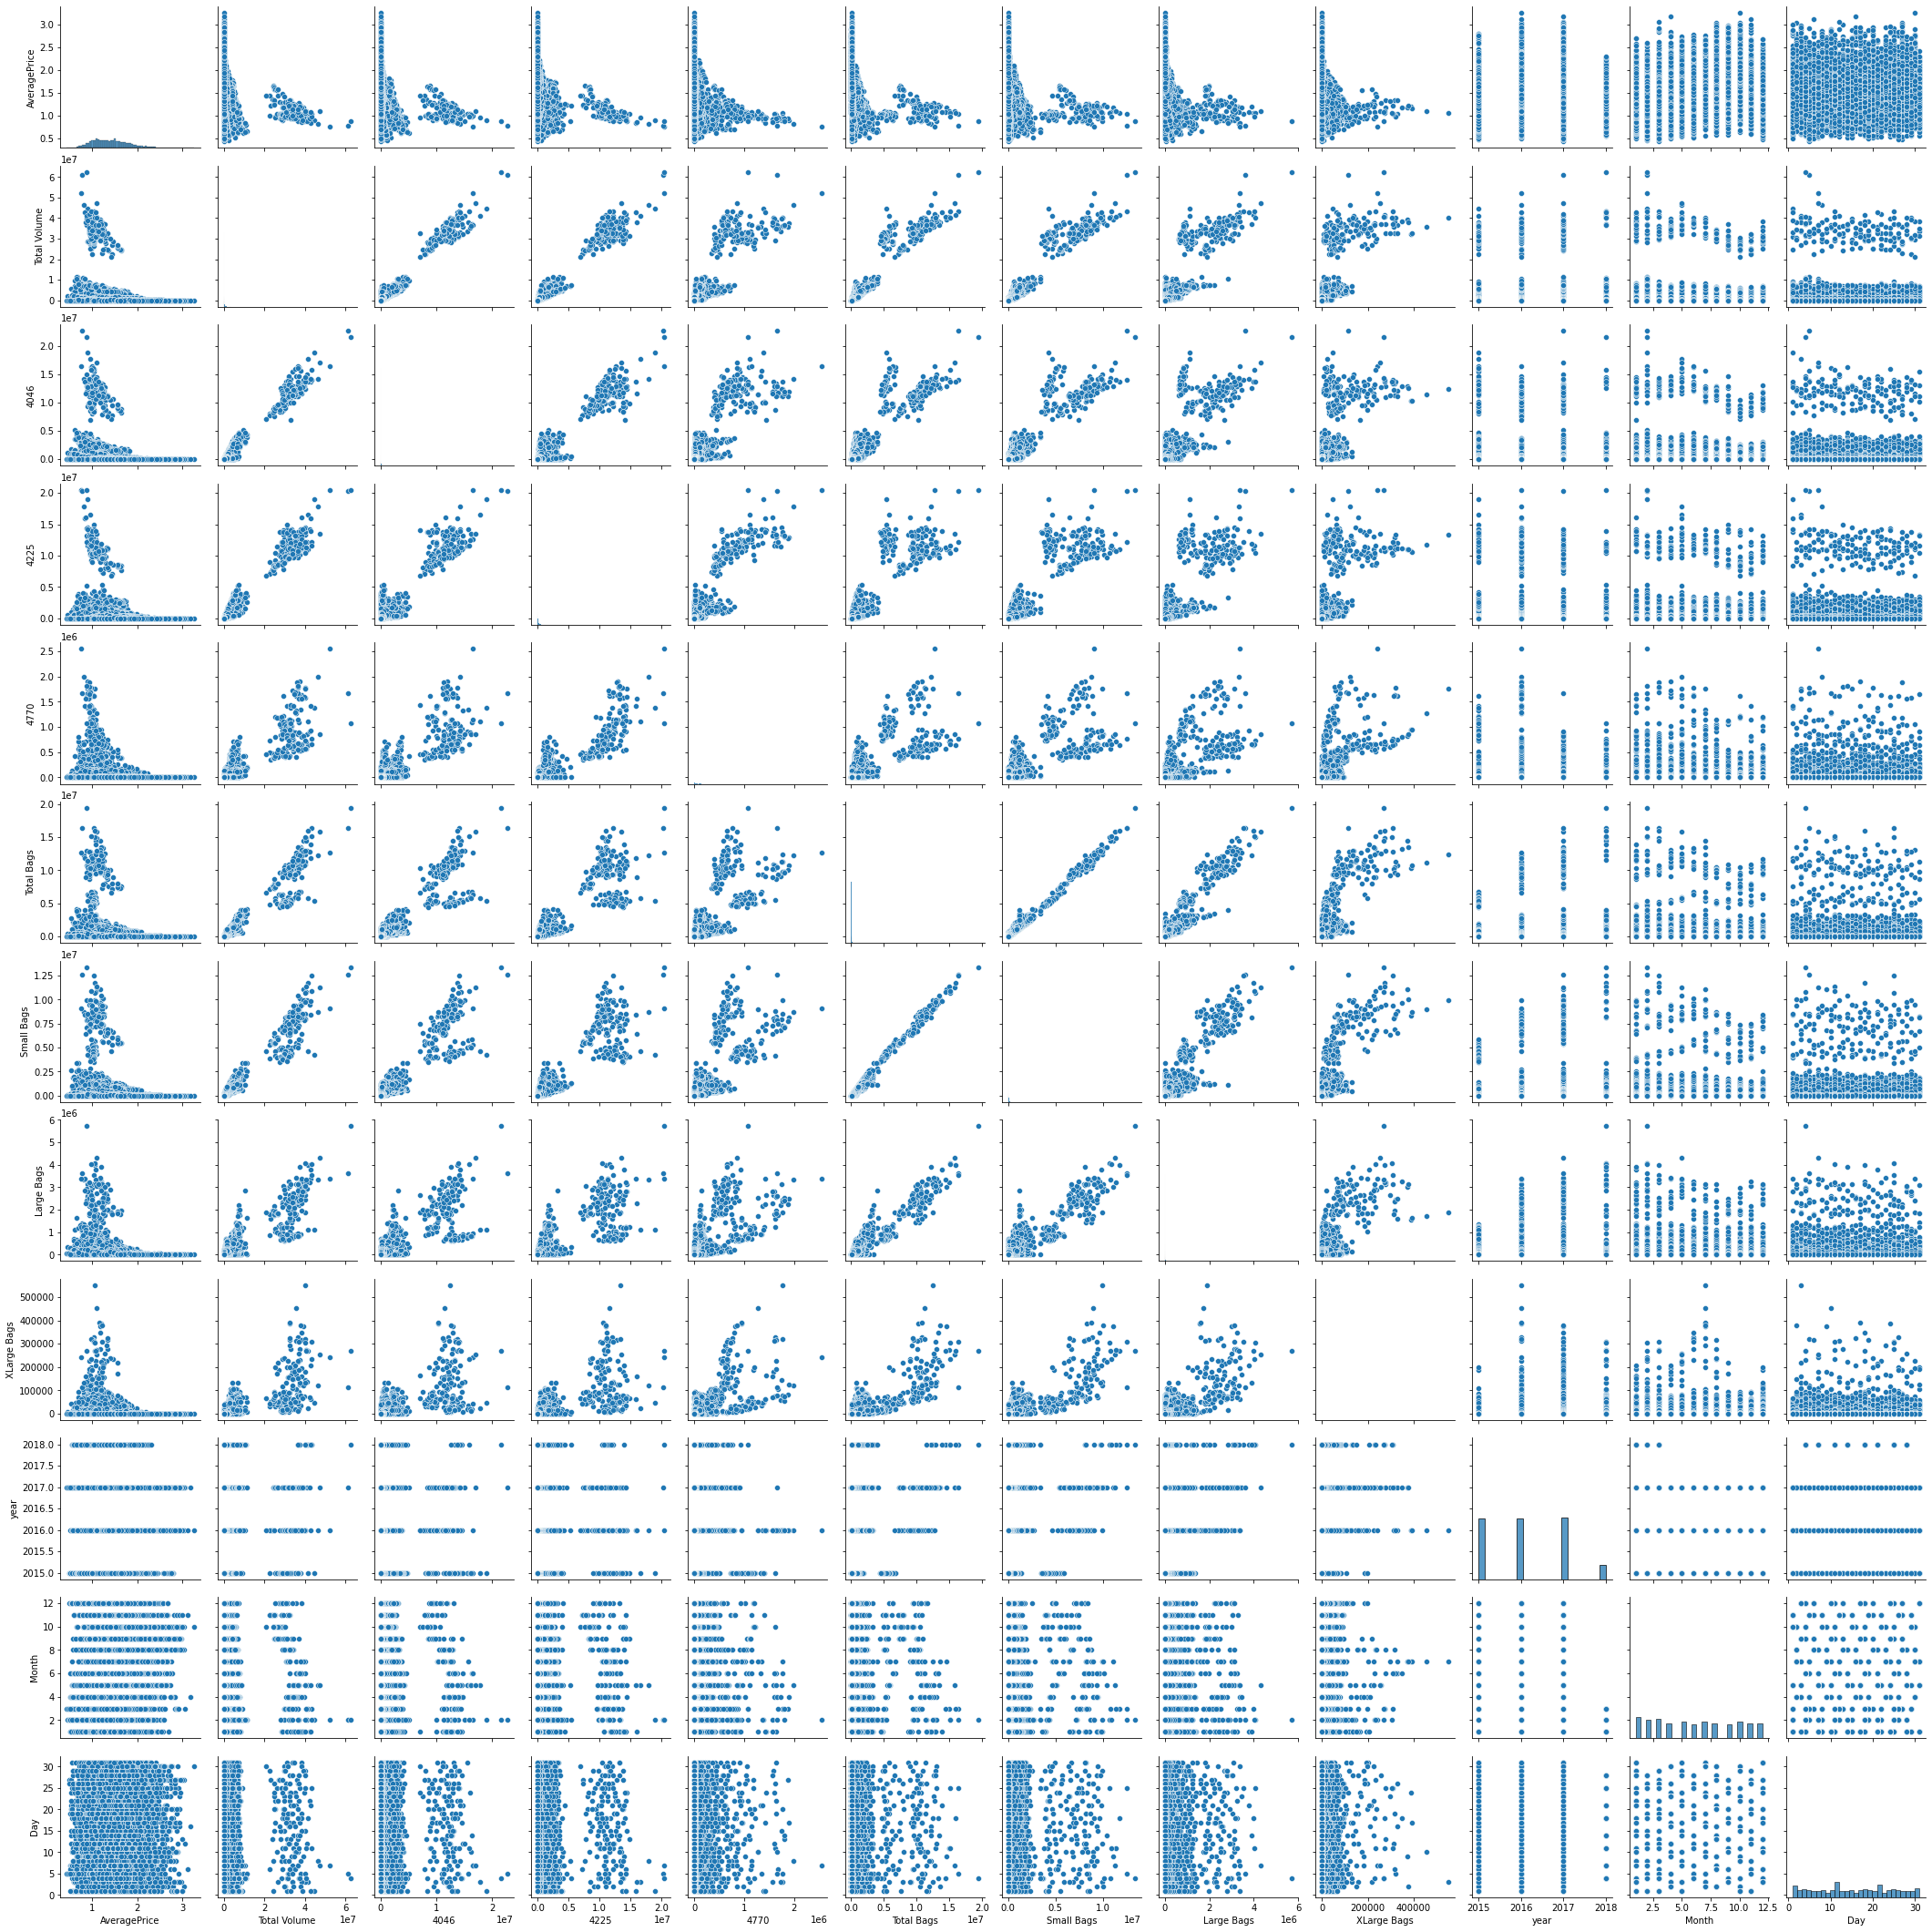

In [23]:
#checking the relation between every column using pair plot method.

sns.pairplot(df)
plt.show()

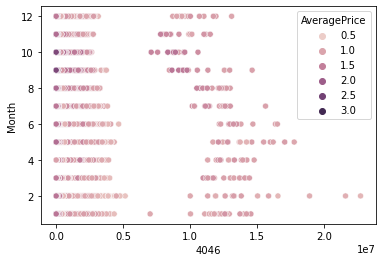

In [26]:
sns.scatterplot(x ="4046", y="Month", hue= "AveragePrice", data = df)
plt.show()

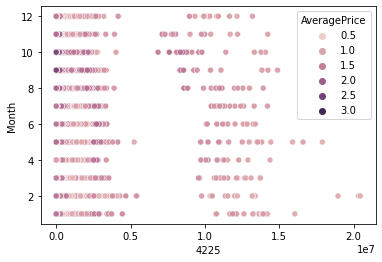

In [27]:
sns.scatterplot(x ="4225", y="Month", hue= "AveragePrice", data = df)
plt.show()

In the above 2 code snippets, we have checked the average price as mentioned in the description

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

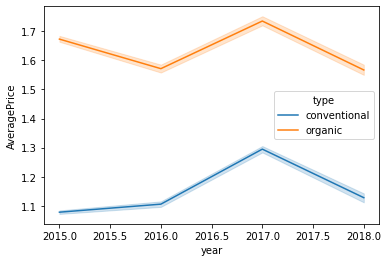

In [28]:
sns.lineplot(x= "year",y= "AveragePrice",hue="type",data=df)

Next we will the relation between year and total volume

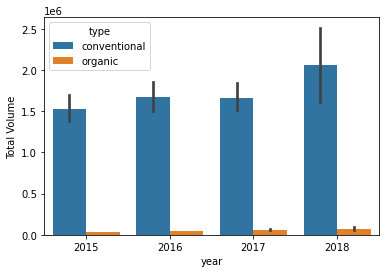

In [29]:
sns.barplot(x="year",y="Total Volume",hue="type",data=df)
plt.show()

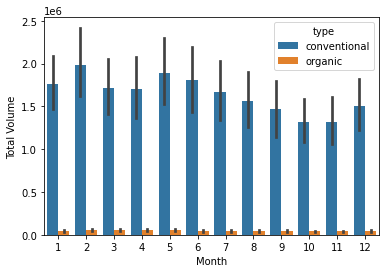

In [30]:
sns.barplot(x="Month",y="Total Volume",hue="type",data=df)
plt.show()

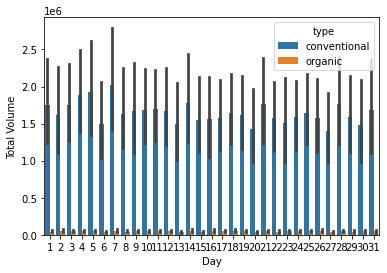

In [31]:
sns.barplot(x="Day",y="Total Volume",hue="type",data=df)
plt.show()

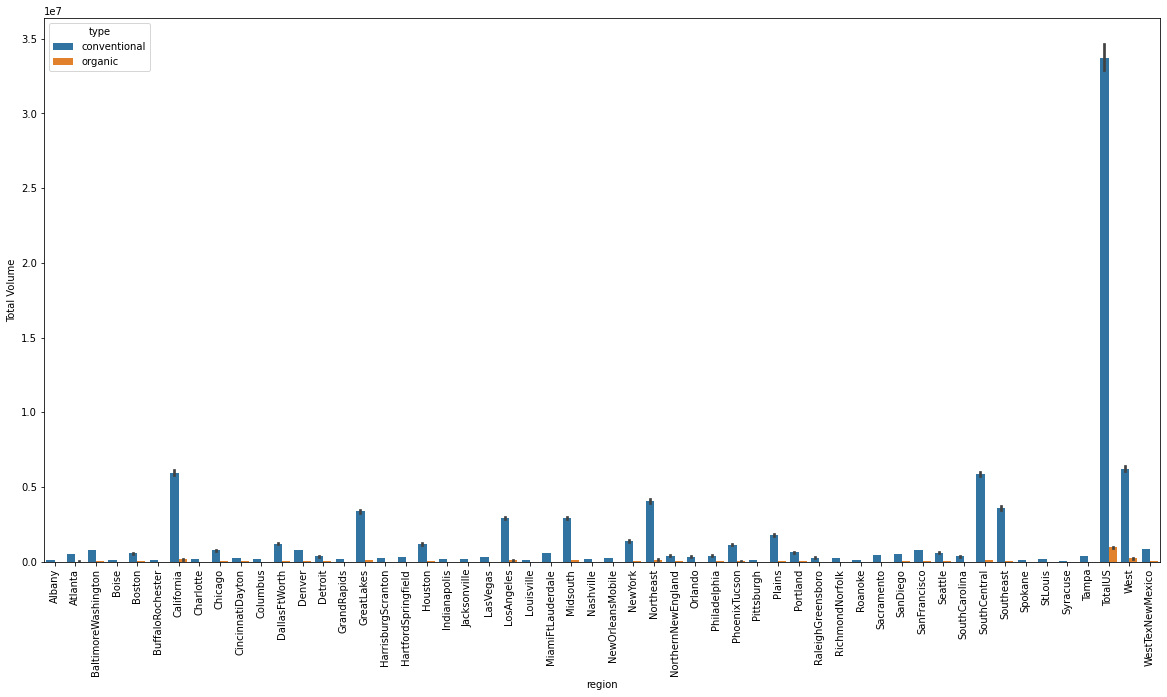

In [34]:
plt.figure(figsize=(20,10))
sns.barplot(x="region",y="Total Volume",hue="type",data=df)
plt.xticks(rotation=90)
plt.show()

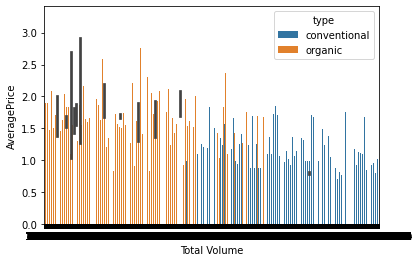

In [37]:
sns.barplot(x="Total Volume",y="AveragePrice",hue="type",data=df)
plt.show()

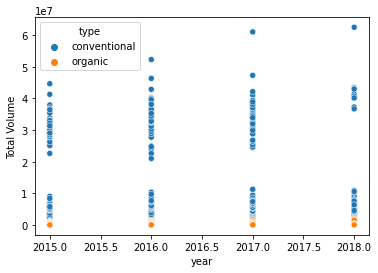

In [38]:
sns.scatterplot(x="year",y="Total Volume",hue="type",data=df)
plt.show()

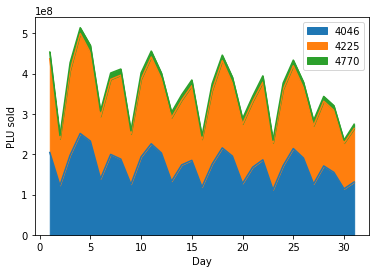

In [41]:
variables = df[["4046", "4225", "4770"]].groupby(df.Day).sum()
variables.plot(kind="area")
plt.xlabel("Day")
plt.ylabel("PLU sold")
plt.show()

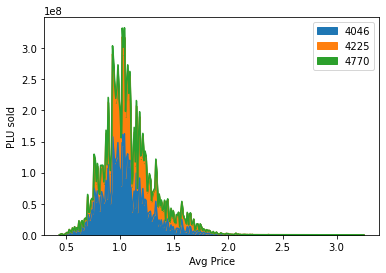

In [42]:
variables = df[["4046", "4225", "4770"]].groupby(df.AveragePrice).sum()
variables.plot(kind="area")
plt.xlabel("Avg Price")
plt.ylabel("PLU sold")
plt.show()

# Checking of Outliers

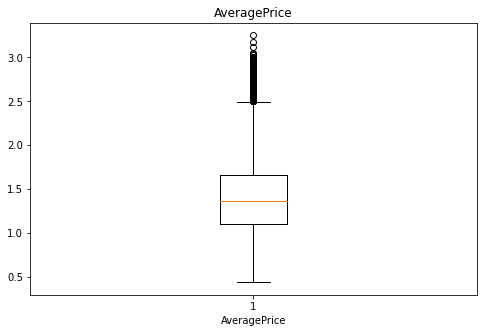

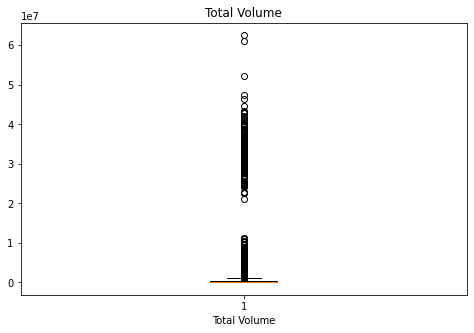

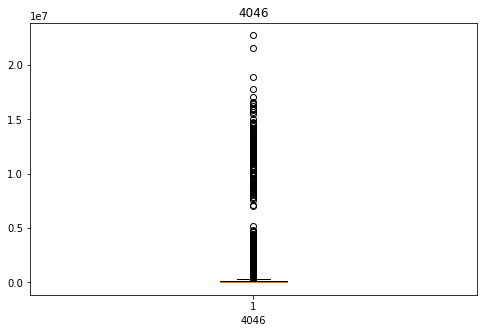

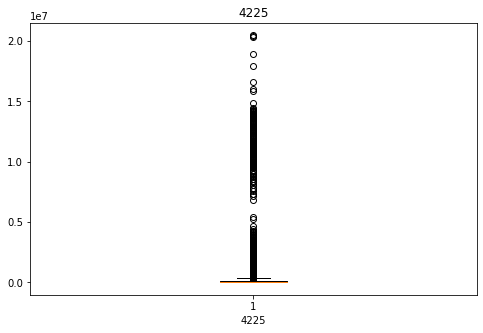

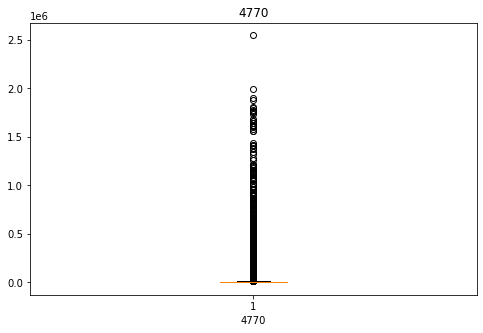

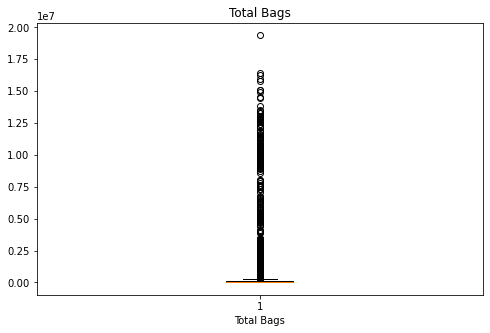

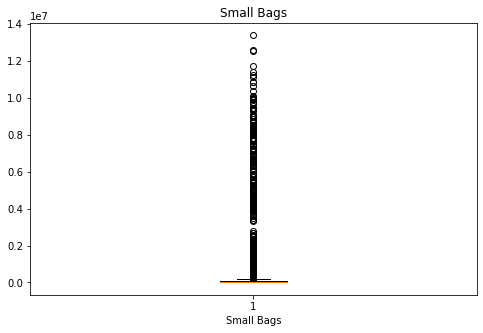

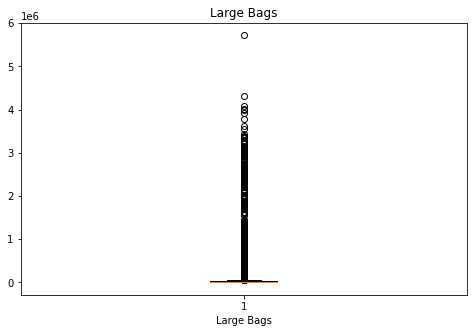

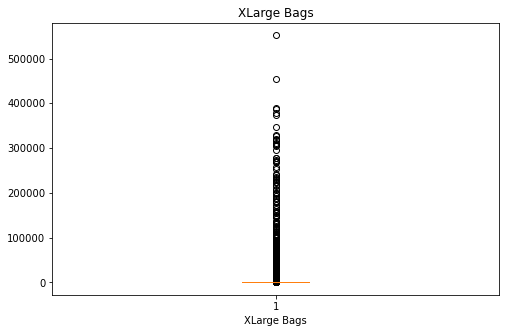

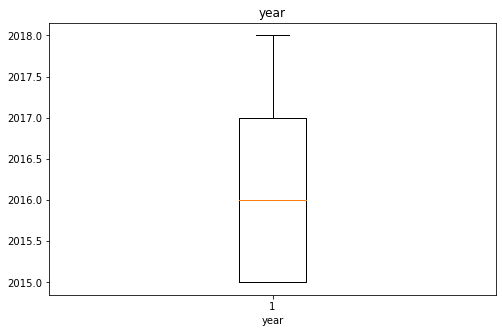

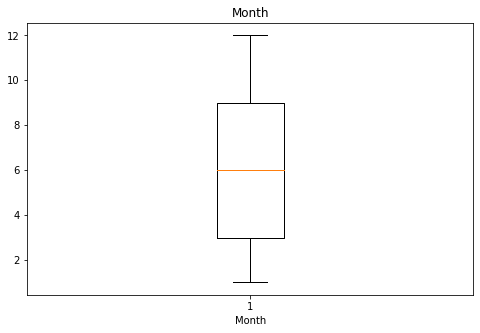

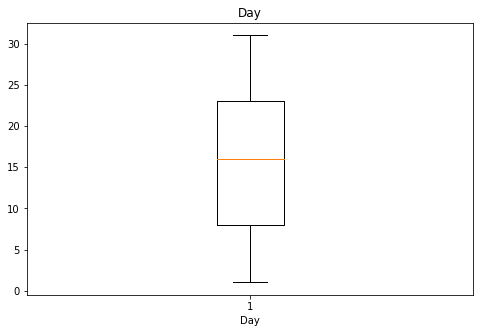

In [39]:
float_column=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month', 'Day']
for col in float_column:
    plt.figure(figsize=(8, 5))
    plt.boxplot(df[col], vert=True)
    plt.title(col)
    plt.xlabel(col)
    plt.show()

In [43]:
from scipy.stats import zscore

In [44]:
columns = df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]
z=np.abs(zscore(columns))
z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...
18244,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
18245,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
18246,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
18247,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [45]:
new_data =df[(z<3).all(axis=1)]
new_data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [46]:
new_data.shape

(17782, 14)

In [47]:
data_loss=(18249-17782)/18249*100 
data_loss

2.55904433119623

In [48]:
new_data.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

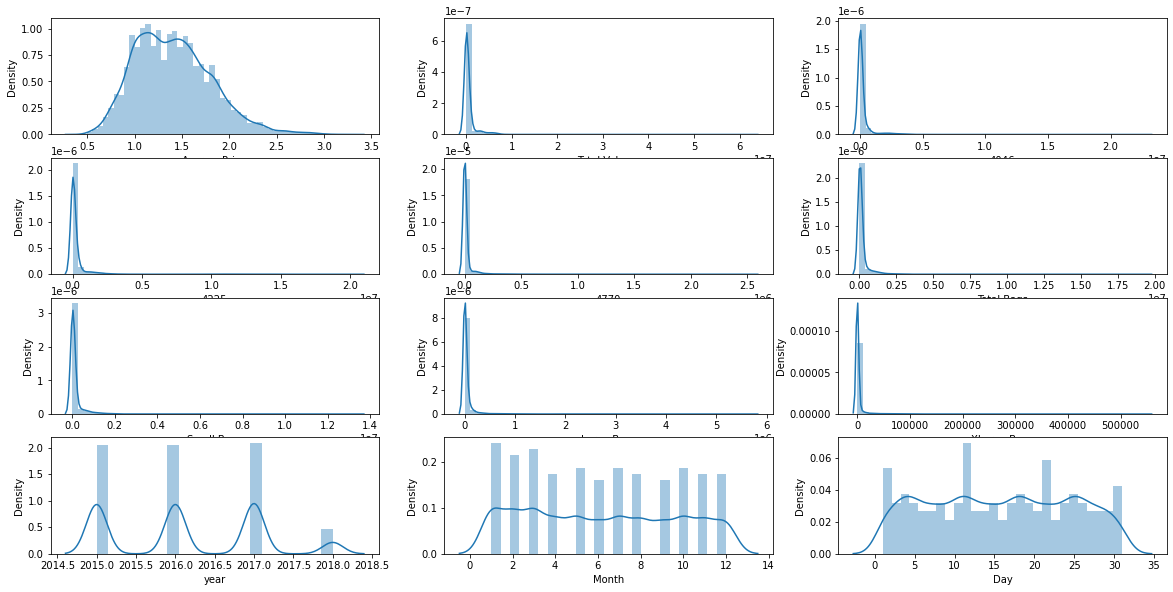

In [49]:
float_column=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month', 'Day']
plt.subplots(figsize=(20, 15))
for i, column in enumerate(float_column):
    plt.subplot(6,3, i + 1)
    sns.distplot(df[column])
plt.show()

In [54]:
from sklearn.preprocessing import PowerTransformer

In [55]:
Columns = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
pt = PowerTransformer(method='yeo-johnson')
new_data[Columns] = pt.fit_transform(new_data[Columns].values)
new_data[Columns].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702


Now, we recheck whether all skewness is removed or not

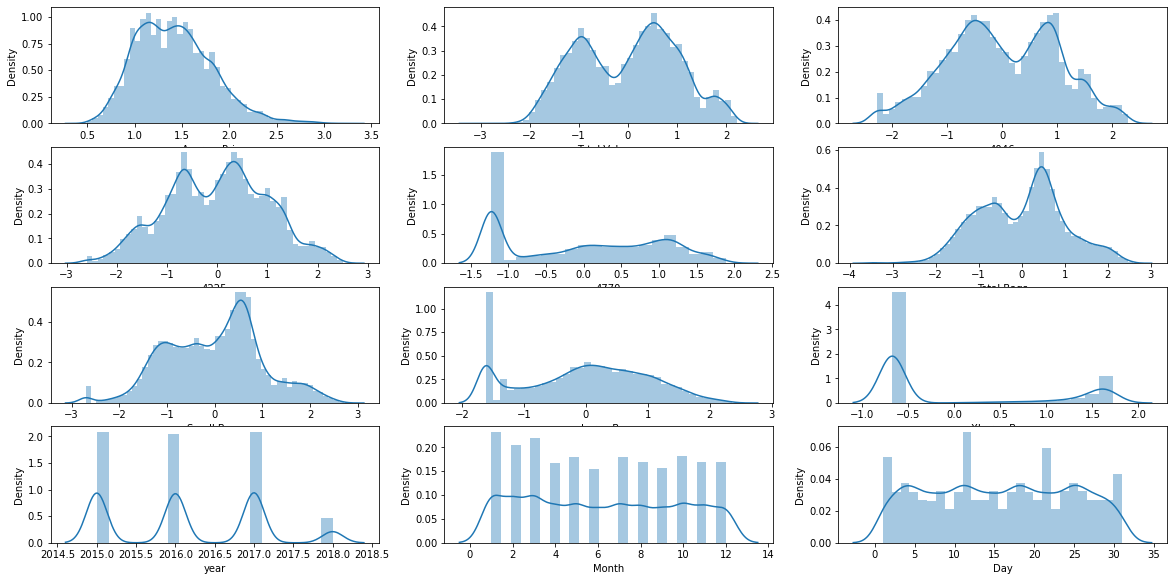

In [57]:
plt.subplots(figsize=(20, 15))
for i, column in enumerate(float_column):
    plt.subplot(6,3, i + 1)
    sns.distplot(new_data[column])
plt.show()

In [68]:
category_columns = ["type","region"]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_data[category_columns]= new_data[category_columns].apply(le.fit_transform)
new_data[category_columns]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


In [69]:
cor = new_data.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,-0.387285,0.608447,0.099910,0.010428,0.157900,0.024742
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.629592,-0.800828,0.076584,0.065709,-0.026332,-0.006248
4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.573880,-0.725826,-0.002396,0.159390,-0.025919,-0.004558
4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.584508,-0.747722,-0.004533,0.032273,-0.024708,-0.005919
4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.616413,-0.780988,-0.051657,0.037805,-0.017377,0.001383
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.613698,-0.725686,0.210924,0.065996,-0.014571,-0.003703
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.603334,-0.720466,0.185955,0.051985,-0.010260,-0.000535
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.452650,-0.500026,0.190295,0.086573,-0.016942,-0.000876
XLarge Bags,-0.387285,0.629592,0.573880,0.584508,0.616413,0.613698,0.603334,0.452650,1.000000,-0.665587,0.159574,-0.020865,0.018751,0.010241
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,-0.665587,1.000000,0.007399,0.021970,-0.005044,-0.002469


<AxesSubplot:>

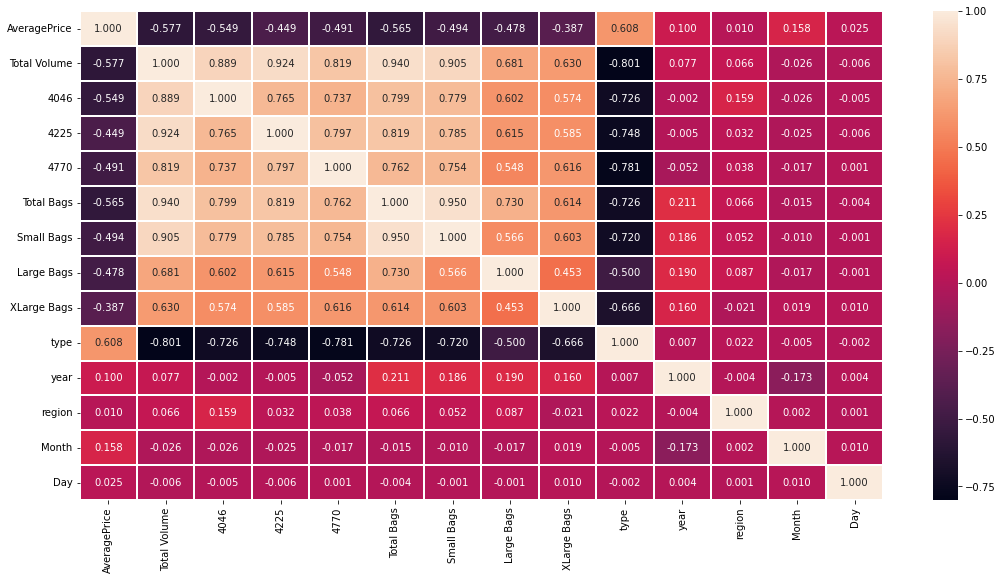

In [70]:
plt.figure(figsize=(18,9))
sns.heatmap(new_data.corr(), fmt ="0.3f", linewidth=0.1, annot=True)

In [71]:
new_data.corr()["AveragePrice"].sort_values()

Total Volume   -0.576829
Total Bags     -0.564616
4046           -0.548618
Small Bags     -0.493621
4770           -0.491320
Large Bags     -0.477879
4225           -0.448579
XLarge Bags    -0.387285
region          0.010428
Day             0.024742
year            0.099910
Month           0.157900
type            0.608447
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

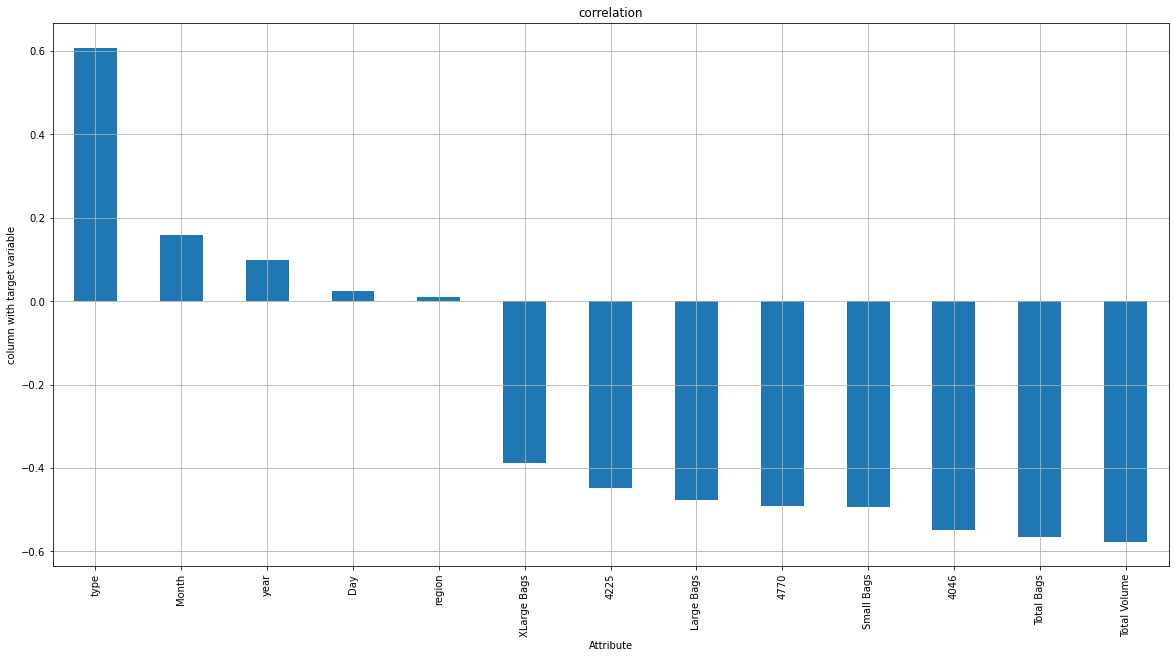

In [73]:
plt.figure(figsize=(20,10))
new_data.corr()["AveragePrice"].sort_values(ascending=False).drop(["AveragePrice"]).plot(kind="bar", grid=True)
plt.xlabel('Attribute')
plt.ylabel('column with target variable')
plt.title('correlation')
plt.show()

In [74]:
#saving the new data for classification
classification_df=new_data

In [75]:
classification_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702,0,2015,0,12,27
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702,0,2015,0,12,20
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702,0,2015,0,12,13
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702,0,2015,0,12,6
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702,0,2015,0,11,29


In [77]:
# Dropping irrelevant columns
new_data.drop("region",axis=1, inplace=True)
new_data.drop("XLarge Bags",axis=1, inplace=True)

In [78]:
new_data.shape

(17782, 12)

In [79]:
# Now, we start Spliting the data into input (x) and target variable (y)
x = new_data.drop("AveragePrice", axis=1)
y = new_data["AveragePrice"]

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [81]:
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

In [82]:
rf_regr=RandomForestRegressor()
rf_regr.fit(x_train,y_train)

# prediction
predicted_rf=rf_regr.predict(x_test)
print("R2_score:",r2_score(y_test,predicted_rf))
print("MAE:",mean_absolute_error(y_test, predicted_rf))
print("MSE:",mean_squared_error(y_test, predicted_rf))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predicted_rf)))

# Checking cv score for Random Forest Regression
print("Cross_Validaton_Score",cross_val_score(rf_regr,x,y,cv=5).mean())
print ("The diff. bet. R2 score and CV is", (r2_score(y_test,predicted_rf)-(cross_val_score(rf_regr,x,y,cv=5).mean())))

R2_score: 0.8673526631317116
MAE: 0.09939550182738263
MSE: 0.02063025647455721
RMSE: 0.14363236569296353
Cross_Validaton_Score 0.20737775417415705
The diff. bet. R2 score and CV is 0.6781488424643981


In [85]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

Lr=LinearRegression()
Lr.fit(x_train,y_train)

predicted_Lr = Lr.predict(x_test)

print("R2_score:",r2_score(y_test,predicted_Lr))
print("MAE:",mean_absolute_error(y_test, predicted_Lr))
print("MSE:",mean_squared_error(y_test, predicted_Lr))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predicted_Lr)))

#checking cv for Linear regression
print("Cross_Validaton_Score",cross_val_score(Lr,x,y,cv=5).mean())


R2_score: 0.54914627594574
MAE: 0.20765031226671304
MSE: 0.07011997511102872
RMSE: 0.26480176568714325
Cross_Validaton_Score 0.2256640569518527


In [99]:
#Hyperparameter tuning-
from sklearn.model_selection import GridSearchCV

parameter_grid={'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['none','sqrt','log2']}
rf_regr = RandomForestRegressor()

# Performing grid search with cross-validation
GCV = GridSearchCV(estimator=rf_regr, param_grid=parameter_grid, cv=5, scoring='neg_mean_squared_error')
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['none', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [100]:
best_parameters = GCV.best_params_
print("Best Hyperparameters:", best_parameters)

Best Hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [104]:
rf_regr = RandomForestRegressor(**best_parameters)
rf_regr.fit(x_train, y_train)
rf_regr.score(x_train, y_train)
# Evaluate the model on the test set
predicted_decisions = rf_regr.predict(x_test)
mse = mean_squared_error(y_test, predicted_decisions)
r2 = r2_score(y_test, predicted_decisions)
print("Best Model - Random Forest Regressor")
print("Mean Squared Error:", mse*100)
print("R-squared:", r2*100)

Best Model - Random Forest Regressor
Mean Squared Error: 2.034875003779715
R-squared: 86.91626783970842


In [105]:
import joblib
joblib.dump(rf_regr, "Avocado_Project.pkl")

['Avocado_Project.pkl']

In [106]:
new_Rf = joblib.load(open("Avocado_Project.pkl",'rb'))
result=new_Rf.score(x_test,y_test)
print(result*100)

86.91626783970842


In [107]:
Df_new = pd.DataFrame([new_Rf.predict(x_test)[:],predicted_decisions[:]],index=['Predicted','Original'])
Df_new

,0,1,2,3,4,5,6,7,8,9,...,3547,3548,3549,3550,3551,3552,3553,3554,3555,3556
Predicted,1.3343,1.011633,1.611333,1.4078,1.214933,0.830633,0.880533,1.1561,1.742533,1.6501,...,2.1858,1.1618,1.410233,1.270533,1.2365,1.6069,1.5808,1.632433,1.9639,2.118267
Original,1.3343,1.011633,1.611333,1.4078,1.214933,0.830633,0.880533,1.1561,1.742533,1.6501,...,2.1858,1.1618,1.410233,1.270533,1.2365,1.6069,1.5808,1.632433,1.9639,2.118267
